(123, 170)
(89, 65, 88, 65)
(300, 300)


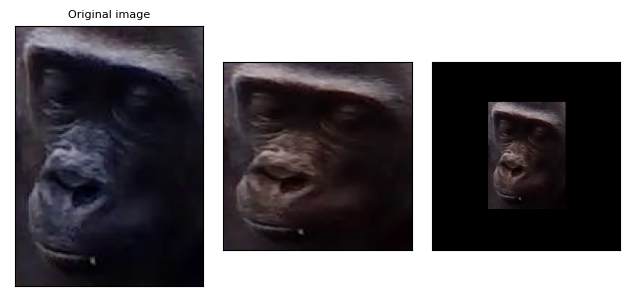

In [26]:
import os
import cv2
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor, Pad, Normalize
import torch

from torchvision.transforms.functional import pad
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
basepath = "/home/rohan/Documents/Uni/Sem3/AI/gorilla-reidentifcation/data/cropped/ES01/ES01_R066_20201019_021b.png"
orig_img = Image.open(basepath)
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()


def transform_image(img, img_size):
    transformations = Compose([
            ToPILImage(),
            Resize(img_size),
        ])
    return transformations(img)

def get_padding(image):
    w = 300 
    h = 300
    
    imsize = image.size
    h_padding = (w - imsize[0]) / 2
    v_padding = (h - imsize[1]) / 2
    l_pad = h_padding if h_padding % 1 == 0 else h_padding+0.5
    t_pad = v_padding if v_padding % 1 == 0 else v_padding+0.5
    r_pad = h_padding if h_padding % 1 == 0 else h_padding-0.5
    b_pad = v_padding if v_padding % 1 == 0 else v_padding-0.5
    
    print(imsize)
    padding = (int(l_pad), int(t_pad), int(r_pad), int(b_pad))
    print(padding)
    return padding

class MyPad(object):
    def __init__(self, fill=0, padding_mode='constant'):
        self.fill = fill
        self.padding_mode = padding_mode
        
    def __call__(self, img):
        return pad(img, get_padding(img), self.fill, self.padding_mode)

def transform_image_padding(img, img_size):
    transformations = Compose([
            ToPILImage(),
            MyPad(),
        ])
    return transformations(img)


img = cv2.imread(str(os.path.join(basepath)))
img_res = transform_image(img, (300,300))
img_pad = transform_image_padding(img, (300,300))
print(img_pad.size)
plot([img_res, img_pad])


